##**1.Import Library/Packages**

In [ ]:
# update the matplotlib version

!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 32.4 MB/s 
     |████████████████████████████████| 959 kB 68.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
# import library/packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

##**2. Load Dataset**

In [ ]:
# load or read the dataset from google drive storages
rent = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/House Rent Prediction/House_Rent_Dataset.csv')
rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
rent.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [ ]:
# check number of rows and columns from the dataset  
print('the shape of data frame (rows, columns):', rent.shape)

the shape of data frame (rows, columns): (4746, 12)


##**3. Data Preprocessing**

###**a) Data Understanding**

In [ ]:
# check information of dataset
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
# check all columns
rent.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [ ]:
# rearrange columns in dataframe
rent = rent[['Posted On', 'BHK', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom','Point of Contact', 'Rent']]

In [ ]:
# rename target feature/variable
rent = rent.rename({'Rent': 'Rent Price'}, axis=1)

In [ ]:
# replace/change whitespace in column name to underline
rent.columns = rent.columns.str.replace(' ','_')

In [ ]:
# change the data type of Posted on column to date time (show only date: '.dt.date') 
rent['Posted_On'] = pd.to_datetime(rent['Posted_On'])

In [ ]:
# recheck information of dataset
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted_On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Size               4746 non-null   int64         
 3   Floor              4746 non-null   object        
 4   Area_Type          4746 non-null   object        
 5   Area_Locality      4746 non-null   object        
 6   City               4746 non-null   object        
 7   Furnishing_Status  4746 non-null   object        
 8   Tenant_Preferred   4746 non-null   object        
 9   Bathroom           4746 non-null   int64         
 10  Point_of_Contact   4746 non-null   object        
 11  Rent_Price         4746 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


###**b) Data Cleansing**

In [ ]:
# check the dataset if any the missing values

checker = []
for col in rent.columns :
    checker.append([col, rent[col].dtype, 
                     rent[col].isnull().sum(), 
                     round((rent[col].isnull().sum()/len(rent[col])) * 100,2),
                     rent[col].nunique()]);

rent_info = pd.DataFrame(data=checker, columns=['Features', 'Data_Type', 'Missing_Value', 'Missing_Value_Pct', 'Unique_Value'])
rent_info

,Features,Data_Type,Missing_Value,Missing_Value_Pct,Unique_Value
0,Posted_On,datetime64[ns],0,0.0,81
1,BHK,int64,0,0.0,6
2,Size,int64,0,0.0,615
3,Floor,object,0,0.0,480
4,Area_Type,object,0,0.0,3
5,Area_Locality,object,0,0.0,2235
6,City,object,0,0.0,6
7,Furnishing_Status,object,0,0.0,3
8,Tenant_Preferred,object,0,0.0,3
9,Bathroom,int64,0,0.0,8


> **Observation:**
  - it can be seen from the table, there are no features that have missing values



###**c) Data Duplicated**

In [ ]:
# count the data duplicated 
rent.duplicated().sum()

0

> **Observation:**
  - it can be seen, there are no features that have duplicated values



##**4) Exploratory Data Analysis (EDA)**

###**a) Univariate Analysis**

In [ ]:
# grouping the categorical features
cats_feat = [column for column in rent.columns if rent[column].dtype == 'object']

In [ ]:
# grouping the numerical features
nums_feat = ['Rent_Price','BHK', 'Size', 'Bathroom']

In [ ]:
# check list of columns in cats_feat
cats_feat

['Floor',
 'Area_Type',
 'Area_Locality',
 'City',
 'Furnishing_Status',
 'Tenant_Preferred',
 'Point_of_Contact']

In [ ]:
# check list of columns in nums_feat
nums_feat

['Rent_Price', 'BHK', 'Size', 'Bathroom']

####**Numerical Features**

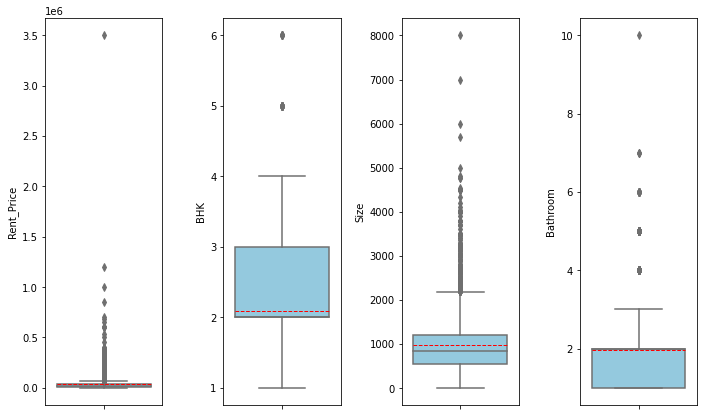

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(0, len(nums_feat)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=nums_feat[i],data=rent,color='skyblue', showmeans=True, meanline=True, meanprops={'color':'red'})
    plt.tight_layout(pad=1.5)

> **Observation:**
- Overall, there are **outliers** in the numerical features, but the outliers that are too extreme are in the Rent feature (the target feature), and the size feature.
- Outliers on the BHK and Bathroom features it can still be **tolerated**
- Furthermore,outliers can be **removed or transformed** for machine learning modeling

####**Categorical Features**

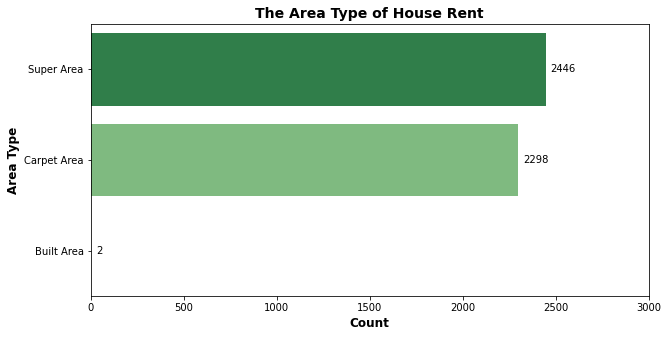

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = rent,
                   y = 'Area_Type',
                   order = rent['Area_Type'].value_counts().index,
                   palette= 'Greens_r')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,3000)
ax.set_title("The Area Type of House Rent", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Area Type', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- Houses/apartments/flats for rent in the category of super area, **more available** than the carpet area or built area


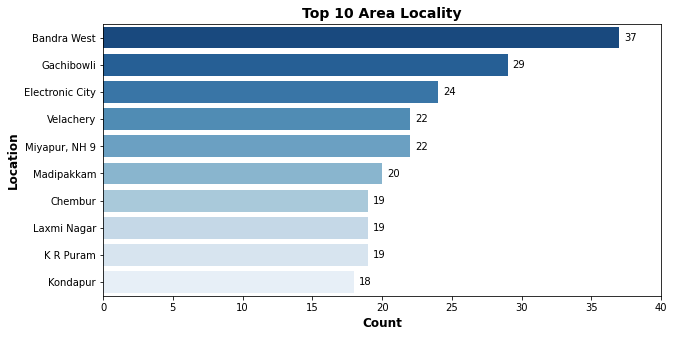

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = rent,
                   y = 'Area_Locality',
                   order = rent['Area_Locality'].value_counts().head(10).index,
                   palette='Blues_r')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,40)
ax.set_title("Top 10 Area Locality", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Location', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- In the Bandra West area, there are **more** houses/apartments/flats for rent than in other areas.


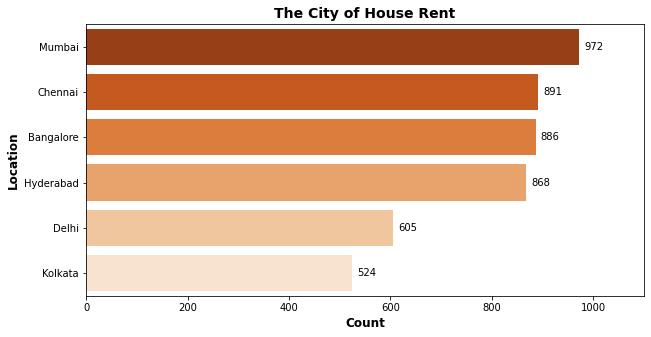

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = rent,
                   y = 'City',
                   order = rent['City'].value_counts().index,
                   palette= 'Oranges_r')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,1100)
ax.set_title("The City of House Rent", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Location', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- In the Mumbai city, there are **more** houses/apartments/flats for rent than in other cities.
- While in Kolkata city, there are **most minor** houses/apartments/flats for rent than in other cities.



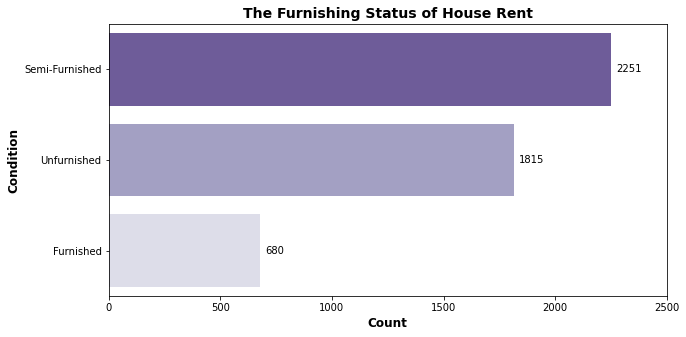

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = rent,
                   y = 'Furnishing_Status',
                   order = rent['Furnishing_Status'].value_counts().index,
                   palette = 'Purples_r')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,2500)
ax.set_title("The Furnishing Status of House Rent", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Condition', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- **Most** houses/apartments/flats for rent with **semi-furnished** conditions. 
- While the number of houses/apartments/flats that are rented out with **furnished** conditions is the **least**.



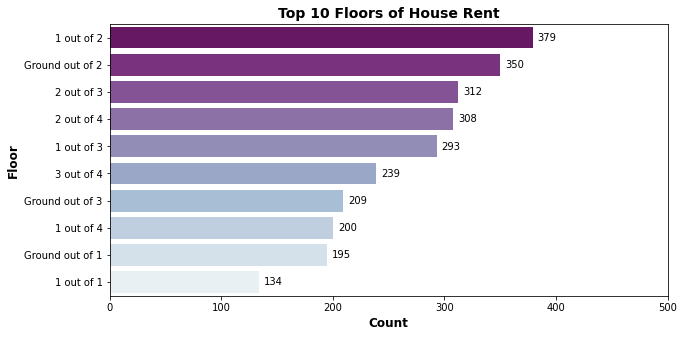

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = rent,
                   y = 'Floor',
                   order = rent['Floor'].value_counts().head(10).index,
                   palette = 'BuPu_r')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,500)
ax.set_title("Top 10 Floors of House Rent", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Floor', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- The **most** rented houses/apartments/flats have **1 of 2 floors**.
- The **least** rented houses/apartments/flats have **1 of 1 floors**.

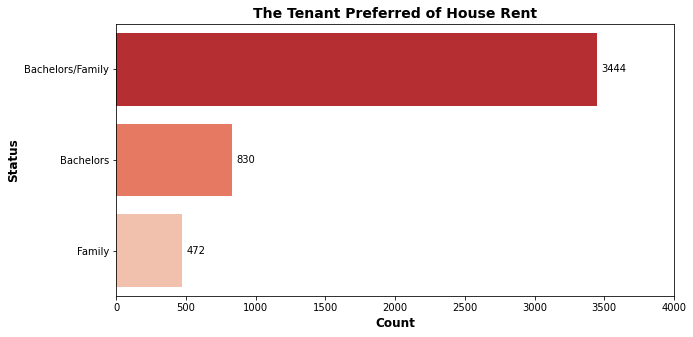

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = rent,
                   y = 'Tenant_Preferred',
                   order = rent['Tenant_Preferred'].value_counts().index,
                   palette = 'Reds_r')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,4000)
ax.set_title("The Tenant Preferred of House Rent", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Status', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- The **most** rented houses/apartments/flats are for **bachelors/family**.
- The **least** rented houses/apartments/flats are for **family**.

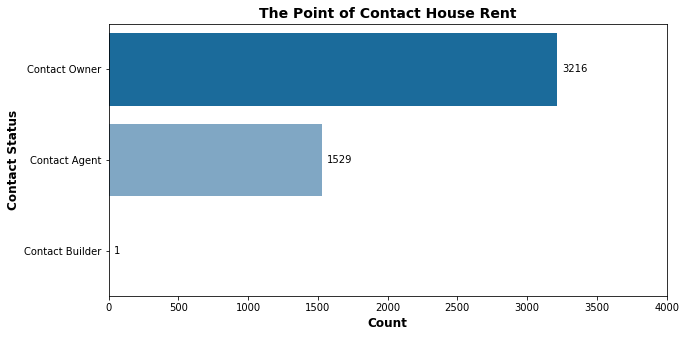

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = rent,
                   y = 'Point_of_Contact',
                   order = rent['Point_of_Contact'].value_counts().index,
                   palette = 'PuBu_r')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,4000)
ax.set_title("The Point of Contact House Rent", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Contact Status', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- The **most** rented houses/apartments/flats are available through **contact owner**
- The **least** rented houses/apartments/flats are available through **contact builder**

###**b) Multivariate Analysis**

In [ ]:
tenant_city = rent.groupby(['Tenant_Preferred','City']).agg({'Tenant_Preferred': [('Total', 'size')]})
tenant_city.columns = tenant_city.columns.droplevel()
tenant_city = tenant_city.sort_values(['Tenant_Preferred','Total'], ascending=False)
tenant_city.reset_index(inplace=True)
tenant_city

,Tenant_Preferred,City,Total
0,Family,Mumbai,186
1,Family,Chennai,105
2,Family,Hyderabad,90
3,Family,Bangalore,57
4,Family,Kolkata,23
5,Family,Delhi,11
6,Bachelors/Family,Bangalore,694
7,Bachelors/Family,Hyderabad,676
8,Bachelors/Family,Chennai,649
9,Bachelors/Family,Mumbai,614


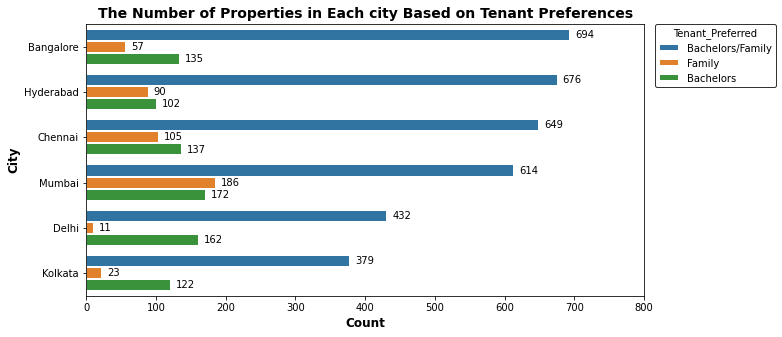

In [ ]:
tenant_city = rent.groupby(['Tenant_Preferred','City']).agg({'Tenant_Preferred': [('Total', 'size')]})
tenant_city.columns = tenant_city.columns.droplevel()
tenant_city = tenant_city.sort_values('Total', ascending=False)
tenant_city.reset_index(inplace=True)
tenant_city.drop_duplicates(['Tenant_Preferred'])

plt.figure(figsize=(10,5))
ax = sns.barplot(data = tenant_city,
                 y = 'City',
                 x = 'Total',
                 hue= 'Tenant_Preferred',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.legend(title= 'Tenant_Preferred', bbox_to_anchor=(1.01,1.02), 
          loc='upper left', edgecolor='black')
ax.set_xlim(0,800)
ax.set_title("The Number of Properties in Each city Based on Tenant Preferences", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('City', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- Bangalore city provides the **most** houses/apartments/flats for **bachelors/family** tenants compared to other cities.
- Mumbai city provides the **most** houses/apartments/flats for **family or bachelors** tenants compared to other cities.
- Kolkata city provides the **least** number of houses/apartments/flats for **bachelor/family** tenants compared to other cities.
- Hyderabad city provides the **least** number of houses/apartments/flats for **bachelor** tenants compared to other cities.
- Delhi city provides the **least** number of houses/apartments/flats for **family** tenants compared to other cities.

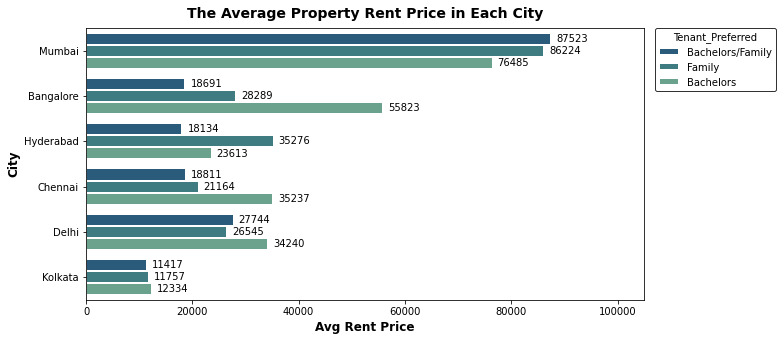

In [ ]:
city_avg_rent = rent.groupby(['City','Tenant_Preferred']).agg({'Rent_Price': [('Avg_Rent', 'mean')]})
city_avg_rent.columns = city_avg_rent.columns.droplevel()
city_avg_rent = city_avg_rent.sort_values('Avg_Rent', ascending=False)
city_avg_rent.reset_index(inplace=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = city_avg_rent,
                 y = 'City',
                 x = 'Avg_Rent',
                 hue= 'Tenant_Preferred',
                 palette= 'crest_r',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.legend(title= 'Tenant_Preferred', bbox_to_anchor=(1.01,1.02), 
          loc='upper left', edgecolor='black')
ax.set_xlim(0,105000)
ax.set_title("The Average Property Rent Price in Each City", fontsize=14, weight='bold', pad=10)
ax.set_xlabel('Avg Rent Price', fontsize=12, weight='bold')
ax.set_ylabel('City', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- Mumbai city has the **highest average rent price** for **bachelors/family** tenants compared to other cities.
- Mumbai city has the **highest average rent price** for **family** tenants compared to other cities.
- Bangalore has the **highest average rent price** for **bachelors** tenants compared to other cities.

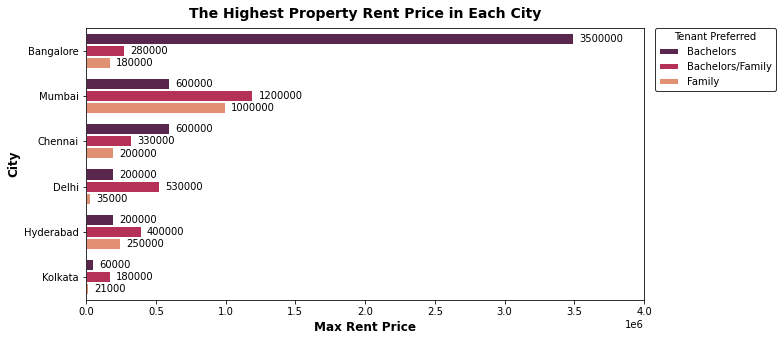

In [ ]:
city_max_rent = rent.groupby(['City','Tenant_Preferred']).agg({'Rent_Price': [('max_Rent', 'max')]})
city_max_rent.columns = city_max_rent.columns.droplevel()
city_max_rent = city_max_rent.sort_values('max_Rent', ascending=False)
city_max_rent.reset_index(inplace=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = city_max_rent,
                 y = 'City',
                 x = 'max_Rent',
                 hue= 'Tenant_Preferred',
                 palette= 'rocket',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.legend(title= 'Tenant Preferred', bbox_to_anchor=(1.01,1.02), 
          loc='upper left', edgecolor='black')
ax.set_xlim(0,4000000)
ax.set_title("The Highest Property Rent Price in Each City", fontsize=14, weight='bold', pad=10)
ax.set_xlabel('Max Rent Price', fontsize=12, weight='bold')
ax.set_ylabel('City', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- Bangalore city has the **highest rent price** for **bachelors** tenants compared to other cities
- Mumbai city has the **highest rent price** for **bachelors/family** tenants compared to other cities
- Mumbai city has the **highest rent price** for **family** tenants compared to other cities

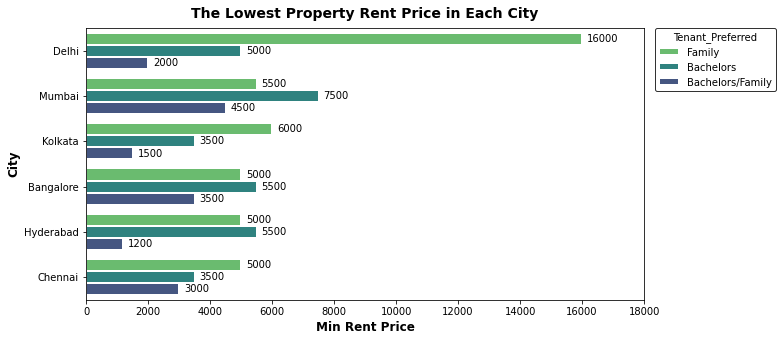

In [ ]:
city_min_rent = rent.groupby(['City','Tenant_Preferred']).agg({'Rent_Price': [('min_Rent', 'min')]})
city_min_rent.columns = city_min_rent.columns.droplevel()
city_min_rent = city_min_rent.sort_values('min_Rent', ascending=False)
city_min_rent.reset_index(inplace=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = city_min_rent,
                 y = 'City',
                 x = 'min_Rent',
                 hue= 'Tenant_Preferred',
                 palette= 'viridis_r',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.legend(title= 'Tenant_Preferred', bbox_to_anchor=(1.01,1.02), 
          loc='upper left', edgecolor='black')
ax.set_xlim(0,18000)
ax.set_title("The Lowest Property Rent Price in Each City", fontsize=14, weight='bold', pad=10)
ax.set_xlabel('Min Rent Price', fontsize=12, weight='bold')
ax.set_ylabel('City', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- Hyderabad city has the **lowest rent price** for **bachelors/family** tenants compared to other cities
- Kolkata and Chennai city has the **lowest rent price** for **bachelors** tenants compared to other cities
- Bangalore, Hyderabad, and Chennai city has the **lowest rent price** for **family** tenants compared to other cities


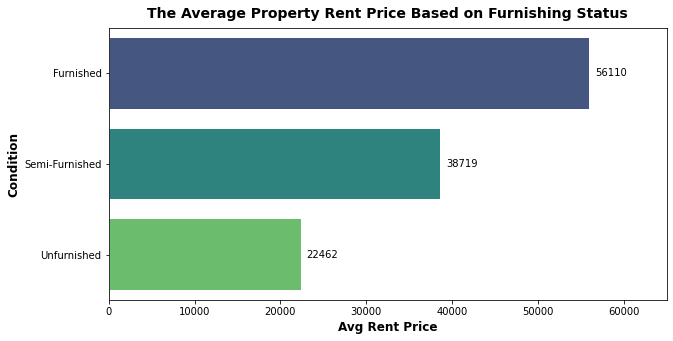

In [ ]:
furnish_rent = rent.groupby(['Furnishing_Status']).agg({'Rent_Price': [('avg_Rent', 'mean')]})
furnish_rent.columns = furnish_rent.columns.droplevel()
furnish_rent = furnish_rent.sort_values('avg_Rent', ascending=False)
furnish_rent.reset_index(inplace=True)
furnish_rent

plt.figure(figsize=(10,5))
ax = sns.barplot(data = furnish_rent,
                 y = 'Furnishing_Status',
                 x = 'avg_Rent',
                 palette= 'viridis',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,65000)
ax.set_title("The Average Property Rent Price Based on Furnishing Status", fontsize=14, weight='bold', pad=10)
ax.set_xlabel('Avg Rent Price', fontsize=12, weight='bold')
ax.set_ylabel('Condition', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- Furnished house/apartment/flats with a much **higher average rent price** than semi-furnished and unfurnished


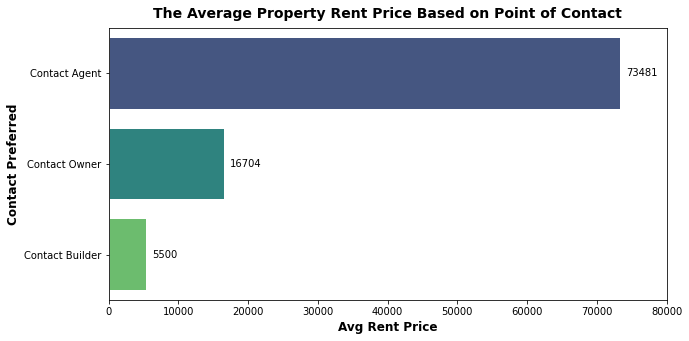

In [ ]:
contact_avg_rent = rent.groupby(['Point_of_Contact']).agg({'Rent_Price': [('avg_Rent', 'mean')]})
contact_avg_rent.columns = contact_avg_rent.columns.droplevel()
contact_avg_rent = contact_avg_rent.sort_values('avg_Rent', ascending=False)
contact_avg_rent.reset_index(inplace=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = contact_avg_rent,
                 y = 'Point_of_Contact',
                 x = 'avg_Rent',
                 palette= 'viridis',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,80000)
ax.set_title("The Average Property Rent Price Based on Point of Contact", fontsize=14, weight='bold', pad=10)
ax.set_xlabel('Avg Rent Price', fontsize=12, weight='bold')
ax.set_ylabel('Contact Preferred', fontsize=12, weight='bold')
plt.show()



> **Observation:**
- Houses/apartments/flats rented through **agents** have a much **higher average rent price** than through owners or developers/builders

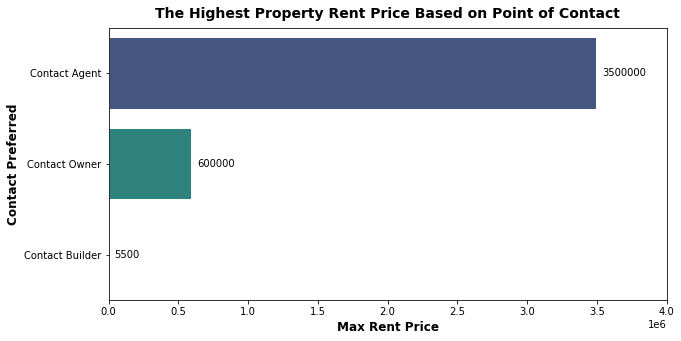

In [ ]:
contact_max_rent = rent.groupby(['Point_of_Contact']).agg({'Rent_Price': [('max_Rent', 'max')]})
contact_max_rent.columns = contact_max_rent.columns.droplevel()
contact_max_rent = contact_max_rent.sort_values('max_Rent', ascending=False)
contact_max_rent.reset_index(inplace=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = contact_max_rent,
                 y = 'Point_of_Contact',
                 x = 'max_Rent',
                 palette= 'viridis',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,4000000)
ax.set_title("The Highest Property Rent Price Based on Point of Contact", fontsize=14, weight='bold', pad=10)
ax.set_xlabel('Max Rent Price', fontsize=12, weight='bold')
ax.set_ylabel('Contact Preferred', fontsize=12, weight='bold')
plt.show()



> **Observation:**
- Houses/apartments/flats rented through **agents** have a much **highest rent price** than through owners or developers/builders

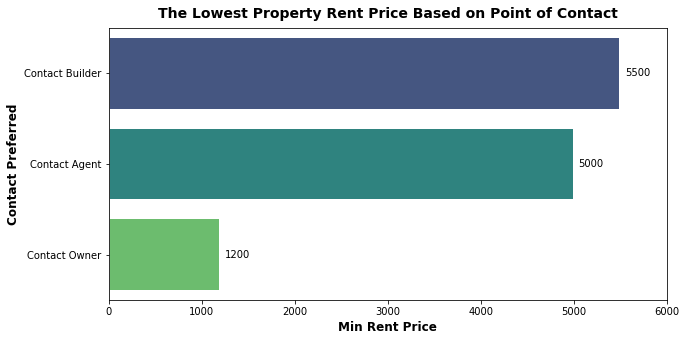

In [ ]:
contact_min_rent = rent.groupby(['Point_of_Contact']).agg({'Rent_Price': [('min_Rent', 'min')]})
contact_min_rent.columns = contact_min_rent.columns.droplevel()
contact_min_rent = contact_min_rent.sort_values('min_Rent', ascending=False)
contact_min_rent.reset_index(inplace=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = contact_min_rent,
                 y = 'Point_of_Contact',
                 x = 'min_Rent',
                 palette= 'viridis',
                 edgecolor='white',
                 linewidth=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,6000)
ax.set_title("The Lowest Property Rent Price Based on Point of Contact", fontsize=14, weight='bold', pad=10)
ax.set_xlabel('Min Rent Price', fontsize=12, weight='bold')
ax.set_ylabel('Contact Preferred', fontsize=12, weight='bold')
plt.show()

> **Observation:**
- Houses/apartments/flats rented through **owners** have a much **lowest rent price** than through owners or developers/builders

##**5) Feature Engineering**

In [ ]:
#make a new variable
df = rent.copy()

In [ ]:
df.head()

,Posted_On,BHK,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Rent_Price
0,2022-05-18,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000
1,2022-05-13,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000
2,2022-05-16,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000
3,2022-07-04,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000
4,2022-05-09,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500


###**a) Encoding Features**

In [ ]:
# Drop some unused features
df = df.drop(['Posted_On'], axis=1)

In [ ]:
# install category encoder
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 8.0 MB/s 


In [ ]:
# Target encoding for all categorical features
from category_encoders import TargetEncoder

encoder = TargetEncoder()
for cols in cats_feat:
    df[cols]= encoder.fit_transform(df[cols], df['Rent_Price'])

In [ ]:
# check dataset after encoding
df.head()

,BHK,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Rent_Price
0,2,1100,14152.820000,18673.396566,15442.421812,11645.173664,22461.635813,31210.792683,2,16704.206468,10000
1,2,800,17954.607509,18673.396566,18001.126838,11645.173664,38718.810751,31210.792683,1,16704.206468,20000
2,2,1000,17954.607509,18673.396566,23187.503611,11645.173664,38718.810751,31210.792683,1,16704.206468,17000
3,2,800,14446.701847,18673.396566,21108.125797,11645.173664,22461.635813,31210.792683,1,16704.206468,10000
4,2,850,14446.701847,52385.897302,34993.451327,11645.173664,22461.635813,42143.793976,1,16704.206468,7500


###**b) Check Multicolinearity**

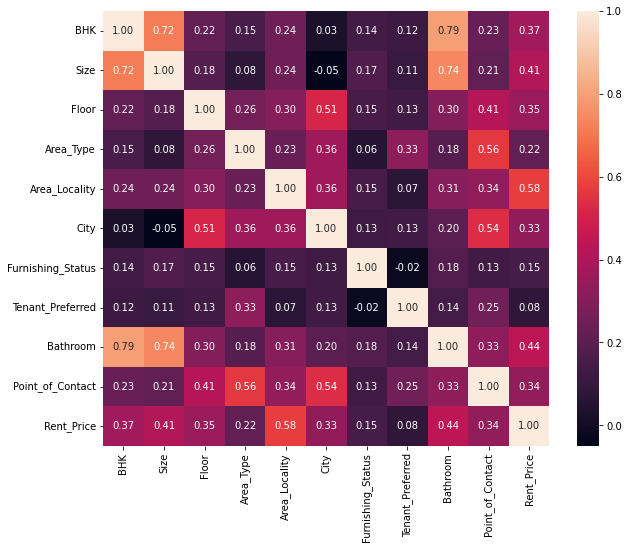

In [ ]:
# check correlation all features with heatmap
corr_ = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

> **Observation:**
- From the heatmap, it appears that the **BHK** and **Bathroom** features have a **fairly high correlation (close to 0.8)**, so it can be suspected that these two features have **multicollinearity**.
- can further see the correlation between features with **VIF Score**.

In [ ]:
# Check multicolinearity with VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df)

vif_rent = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_rent.columns = ['feature','vif_score']
vif_rent = vif_rent.loc[vif_rent.feature!='const']
vif_rent

,feature,vif_score
1,BHK,3.113729
2,Size,2.819494
3,Floor,1.504371
4,Area_Type,1.576488
5,Area_Locality,1.599214
6,City,2.006957
7,Furnishing_Status,1.062747
8,Tenant_Preferred,1.141539
9,Bathroom,3.772766
10,Point_of_Contact,1.981549


> **Observation:**
- From the VIF score, it appears that the BHK and Bathroom features have a VIF value **above 3.0**, so it can be stated that these two features have **multicollinearity**.
- **Drop** features that do not have a high correlation with the target feature
- The BHK feature was **dropped** because it didn't have a higher correlation than the Bathroom feature to the target feature (Rent)

In [ ]:
# Drop BHK feature
df = df.drop(['BHK'], axis=1)

In [ ]:
#check again VIF score of heatmap correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df)

vif_rent = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_rent.columns = ['feature','vif_score']
vif_rent = vif_rent.loc[vif_rent.feature!='const']
vif_rent

,feature,vif_score
1,Size,2.648780
2,Floor,1.500372
3,Area_Type,1.566021
4,Area_Locality,1.598468
5,City,1.955497
6,Furnishing_Status,1.062544
7,Tenant_Preferred,1.141521
8,Bathroom,2.578551
9,Point_of_Contact,1.981256
10,Rent_Price,1.825880


> **Observation:**
- After drop redundant column, it can be seen that all features do not occur multicollinearity (VIF Score < 3)

###**c) Handling Outliers**

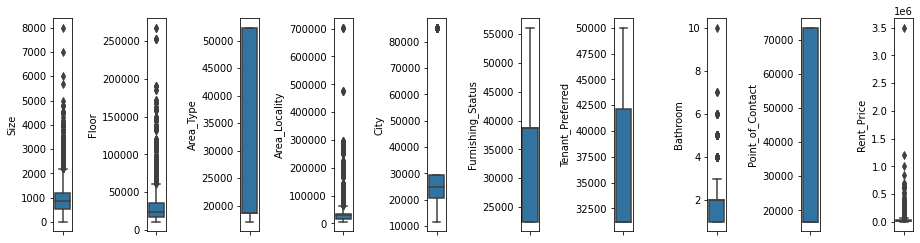

In [ ]:
# check distribution of dataset
count_feats = df.columns

plt.figure(figsize=(13,10))
for i, col in enumerate(count_feats):
    plt.subplot(3,10,i+1)
    sns.boxplot(data=df, y= col)
    plt.tight_layout(pad=1.5)

In [ ]:
outlier_features = ['Rent_Price']
for i in outlier_features:
    df[i] = np.log(df[i]+1)

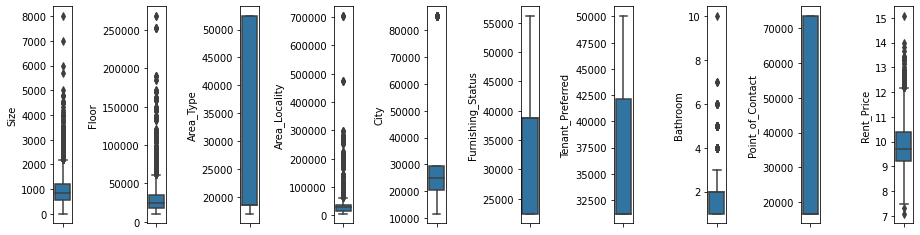

In [ ]:
# check distribution of dataset
count_feats = df.columns

plt.figure(figsize=(13,10))
for i, col in enumerate(count_feats):
    plt.subplot(3,10,i+1)
    sns.boxplot(data=df, y= col)
    plt.tight_layout(pad=1.5)

###**d) Feature + Target**

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split

X = df.drop(columns='Rent_Price').to_numpy()
y = df[['Rent_Price']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement


###**e) Feature Scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)
X

array([[ 0.38461538, -0.56236899,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.07692308, -0.34708586,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.23076923, -0.34708586,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       ...,
       [ 1.38461538, -0.1087854 ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.61776966,  1.        , ...,  1.72043778,
         0.        ,  1.        ],
       [ 0.23076923, -0.30204531,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

###**f) Split Dataset (Train & Test)**

In [ ]:
# make train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(3796, 9) (950, 9)
(3796,) (950,)


##**6) Machine Learning Modeling**

###**a) Ridge Regression**

####**- Define The Model**

In [ ]:
from sklearn.linear_model import Ridge

# define the model
ridge_reg = Ridge(random_state=42)

ridge_reg.fit(X_train, y_train)

Ridge(random_state=42)

####**- Training Error**

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_reg.predict(X_train)

In [ ]:
mse_ridge_train = mean_squared_error(np.exp(y_train), np.exp(y_predict_train))
print("MSE: %.2f" % mean_squared_error(y_train,y_predict_train))
print("RMSE using Ridge: {} ".format(np.round(np.sqrt(mse_ridge_train)),4))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_train)))
print("R2 using Ridge: {:.2f} %".format(np.round(r2_score(y_train,y_predict_train),4)*100))

MSE: 0.17
RMSE using Ridge: 66811.0 
MAE for training data is 0.2979419443107468
MAPE for training data is 0.03017515215545148
R2 using Ridge: 81.17 %


####**- Testing Error**

In [ ]:
# prepare prediction result on test data
y_predict_test = ridge_reg.predict(X_test)

In [ ]:
mse_ridge_test = mean_squared_error(np.exp(y_test), np.exp(y_predict_test))
print("MSE: %.2f" % mean_squared_error(y_test, y_predict_test))
print("RMSE using Ridge: {} ".format(np.round(np.sqrt(mse_ridge_test)),4))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_test, y_test)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_test)))
print("R2 using Ridge: {:.2f} %".format(np.round(r2_score(y_test, y_predict_test),4)*100))

MSE: 0.15
RMSE using Ridge: 110759.0 
MAE for training data is 0.2884088730888854
MAPE for training data is 0.029119222633266658
R2 using Ridge: 82.24 %


####**- Hyperparameter Tuning for Ridge Regression** 

In [ ]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.0000001,0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 10, 100, 1000, 10000, 100000)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 10, 100, 1000, 10000, 100000)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-07},-0.418554,9
1,{'alpha': 1e-06},-0.418554,8
2,{'alpha': 1e-05},-0.418554,7
3,{'alpha': 0.0001},-0.418554,6
4,{'alpha': 0.001},-0.418554,5
5,{'alpha': 0.01},-0.418554,4
6,{'alpha': 0.1},-0.418554,3
7,{'alpha': 1},-0.418552,2
8,{'alpha': 10},-0.418544,1
9,{'alpha': 100},-0.419489,10


In [ ]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + df.drop(columns='Rent_Price').columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,9.845013
1,Size,0.187556
2,Floor,0.093485
3,Area_Type,0.043249
4,Area_Locality,0.278676
5,City,0.142618
6,Furnishing_Status,0.094541
7,Tenant_Preferred,-0.030655
8,Bathroom,0.435439
9,Point_of_Contact,0.360741


####**- Training Error**

In [ ]:
# prepare prediction result on train data
y_predict_train_cv = ridge_reg_gridcv.best_estimator_.predict(X_train)

In [ ]:
mse_ridge_train_cv = mean_squared_error(np.exp(y_train), np.exp(y_predict_train_cv))
print("MSE: %.2f" % mean_squared_error(y_train, y_predict_train_cv))
print("RMSE using Ridge: {} ".format(np.round(np.sqrt(mse_ridge_train_cv)),4))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train_cv, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train_cv, y_train)))
print("R2 using Ridge: {:.2f} %".format(np.round(r2_score(y_train,y_predict_train_cv),4)*100))

MSE: 0.17
RMSE using Ridge: 66729.0 
MAE for training data is 0.29794225520356077
MAPE for training data is 0.030174584020521613
R2 using Ridge: 81.16 %


####**- Testing Error**

In [ ]:
# prepare prediction result on test data
y_predict_test_cv = ridge_reg_gridcv.best_estimator_.predict(X_test)

In [ ]:
mse_ridge_test = mean_squared_error(np.exp(y_test), np.exp(y_predict_test))
print("MSE: %.2f" % mean_squared_error(y_test, y_predict_test))
print("RMSE using Ridge: {} ".format(np.round(np.sqrt(mse_ridge_test)),4))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_test, y_test)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_test)))
print("R2 using Ridge: {:.2f} %".format(np.round(r2_score(y_test, y_predict_test),4)*100))

MSE: 0.15
RMSE using Ridge: 110759.0 
MAE for training data is 0.2884088730888854
MAPE for training data is 0.029119222633266658
R2 using Ridge: 82.24 %


###**b) Lasso Regression**

####**- Define The Model**

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(random_state=42)

lasso_reg.fit(X_train, y_train)

Lasso(random_state=42)

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

model = lasso_reg

coef_rent = pd.DataFrame({
    'feature':['intercept'] + df.drop(columns='Rent_Price').columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_rent

,feature,coefficient
0,intercept,9.879274
1,Size,0.000000
2,Floor,0.000000
3,Area_Type,0.000000
4,Area_Locality,0.000000
5,City,0.000000
6,Furnishing_Status,0.000000
7,Tenant_Preferred,0.000000
8,Bathroom,0.000000
9,Point_of_Contact,0.000000


####**- Training Error**

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_reg.predict(X_train)

In [ ]:
mse_lasso_train = mean_squared_error(np.exp(y_train), np.exp(y_predict_train))
print("MSE: %.2f" % mean_squared_error(y_train,y_predict_train))
print("RMSE using Lasso: {} ".format(np.round(np.sqrt(mse_lasso_train)),4))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_train)))
print("R2 using Lasso: {:.2f} %".format(np.round(r2_score(y_train,y_predict_train),4)*100))

MSE: 0.88
RMSE using Lasso: 82901.0 
MAE for training data is 0.7358989969668781
MAPE for training data is 0.07448918037957286
R2 using Lasso: 0.00 %


####**- Testing Error**

In [ ]:
# prepare prediction result on test data
y_predict_test = lasso_reg.predict(X_test)

In [ ]:
mse_lasso_test = mean_squared_error(np.exp(y_test), np.exp(y_predict_test))
print("MSE: %.2f" % mean_squared_error(y_test, y_predict_test))
print("RMSE using Lasso: {} ".format(np.round(np.sqrt(mse_lasso_test)),4))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_test, y_test)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_test)))
print("R2 using Lasso: {:.2f} %".format(np.round(r2_score(y_test, y_predict_test),4)*100))

MSE: 0.86
RMSE using Lasso: 64851.0 
MAE for training data is 0.7274940509279014
MAPE for training data is 0.07363841479331935
R2 using Lasso: -0.00 %


###**c) Random Forest Regressor**

####**- Define The Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_reg = RandomForestRegressor(random_state=42)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

####**- Training Error**

In [ ]:
# prepare prediction result on training data
y_pred_rf_train = rf_reg.predict(X_train)

In [ ]:
mse_rf_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_rf_train))
print("MSE: %.2f" % mean_squared_error(y_train,y_pred_rf_train))
print("RMSE using RF: {} ".format(np.round(np.sqrt(mse_rf_train)),4))
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_train, y_pred_rf_train),4)*100))

MSE: 0.02
RMSE using RF: 43076.0 
R2 using Random Forest: 97.74 %


####**- Testing Error**

In [ ]:
# prepare prediction result on test data
y_pred_rf_test = rf_reg.predict(X_test)

In [ ]:
mse_rf_test = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf_test))
print("MSE: %.2f" % mean_squared_error(y_test,y_pred_rf_test))
print("RMSE using RF: {} ".format(np.round(np.sqrt(mse_rf_test)),4))
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf_test),4)*100))

MSE: 0.12
RMSE using RF: 28864.0 
R2 using Random Forest: 85.56 %


####**- Hyperparameter Tuning for Random Forest Regressor**

####**- RandomCV**

In [112]:
%%time
from sklearn.model_selection import RandomizedSearchCV


parameters = {'bootstrap': [True, False],
              'max_depth': [5, 10, 15, 20, 25, 30],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 5, 10],
              'min_samples_split': [2, 5, 10, 15, 100],
              'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200]
}
rf_reg_randomcv = RandomizedSearchCV(rf_reg, parameters, n_iter = 50, scoring='neg_mean_absolute_error',
                                     cv = 5, verbose=5, random_state=42, n_jobs = -1)
rf_reg_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 3.84 s, sys: 175 ms, total: 4.02 s
Wall time: 6min 59s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=5)

In [113]:
# the results
cv_result = pd.DataFrame(rf_reg_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
40,"{'n_estimators': 800, 'min_samples_split': 2, ...",-0.260070,1
18,"{'n_estimators': 800, 'min_samples_split': 10,...",-0.260254,2
3,"{'n_estimators': 800, 'min_samples_split': 10,...",-0.260943,3
38,"{'n_estimators': 300, 'min_samples_split': 15,...",-0.261172,4
36,"{'n_estimators': 1100, 'min_samples_split': 10...",-0.261291,5
15,"{'n_estimators': 600, 'min_samples_split': 2, ...",-0.261750,6
25,"{'n_estimators': 200, 'min_samples_split': 15,...",-0.261996,7
32,"{'n_estimators': 1200, 'min_samples_split': 15...",-0.262702,8
48,"{'n_estimators': 1200, 'min_samples_split': 10...",-0.262941,9
19,"{'n_estimators': 1000, 'min_samples_split': 10...",-0.262961,10


####**- Training Error**

In [114]:
# prepare prediction result on train data
y_pred_rf_train_cv = rf_reg_randomcv.best_estimator_.predict(X_train)

In [115]:
mse_rf_train_cv = mean_squared_error(np.exp(y_train), np.exp(y_pred_rf_train_cv))
print("MSE: %.2f" % mean_squared_error(y_train,y_pred_rf_train_cv))
print("RMSE using RF: {} ".format(np.round(np.sqrt(mse_rf_train_cv)),4))
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_train, y_pred_rf_train_cv),4)*100))

MSE: 0.06
RMSE using RF: 55548.0 
R2 using Random Forest: 93.61 %


####**- Testing Error**

In [116]:
# prepare prediction result on test data
y_pred_rf_test_cv = rf_reg_randomcv.best_estimator_.predict(X_test)

In [117]:
mse_rf_test_cv = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf_test_cv))
print("MSE: %.2f" % mean_squared_error(y_test,y_pred_rf_test_cv))
print("RMSE using RF: {} ".format(np.round(np.sqrt(mse_rf_test_cv)),4))
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf_test_cv),4)*100))

MSE: 0.11
RMSE using RF: 31152.0 
R2 using Random Forest: 87.26 %


####**- Feature Importance**

In [118]:
#Check feature important from Random Forest Model
data_feature = df.drop(['Rent_Price'],axis=1)
feature_name_list=data_feature.columns
rf_reg.feature_names = feature_name_list
rf_df= pd.DataFrame({'feature': rf_reg.feature_names,'importance':rf_reg.feature_importances_})
rf_df

,feature,importance
0,Size,0.129496
1,Floor,0.043129
2,Area_Type,0.005370
3,Area_Locality,0.183061
4,City,0.074857
5,Furnishing_Status,0.014312
6,Tenant_Preferred,0.007122
7,Bathroom,0.163404
8,Point_of_Contact,0.379249


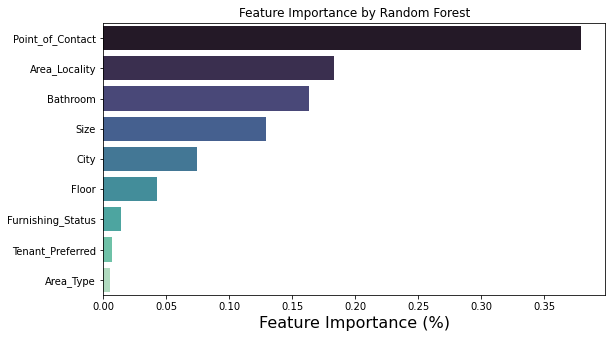

In [119]:
plt.figure(figsize=(9,5))
sns.barplot(x='importance', y='feature', data=rf_df.sort_values('importance', ascending=False), palette='mako')
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)', fontsize=16)
plt.xticks(rotation=0)
plt.ylabel('')
plt.show()

###**d) XGBoost Regressor**

####**- Define The Model**

In [ ]:
from xgboost import XGBRegressor

# Define the model
xgb_reg = XGBRegressor()

xgb_reg.fit(X_train, y_train)

[06:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

####**- Training Error**

In [ ]:
# prepare prediction result on training data
y_pred_xgb_train = xgb_reg.predict(X_train)

In [ ]:
mse_xgb_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_xgb_train))
print("MSE: %.2f" % mean_squared_error(y_train,y_pred_xgb_train))
print("RMSE using RF: {} ".format(np.round(np.sqrt(mse_xgb_train)),4))
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_train, y_pred_xgb_train),4)*100))

MSE: 0.11
RMSE using RF: 52619.0 
R2 using Random Forest: 87.46 %


####**- Testing Error**

In [ ]:
# prepare prediction result on test data
y_pred_xgb_test = xgb_reg.predict(X_test)

In [ ]:
mse_xgb_test = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb_test))
print("MSE: %.2f" % mean_squared_error(y_test,y_pred_xgb_test))
print("RMSE using RF: {} ".format(np.round(np.sqrt(mse_xgb_test)),4))
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_xgb_test),4)*100))

MSE: 0.11
RMSE using RF: 27356.0 
R2 using Random Forest: 86.98 %


####**- Hyperparameter Tuning for XGBoost Regressor**

In [191]:
%%time
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1500,2000],
              'max_depth': [2,3,4,5,6,8,10,20,30,40,50,60,70,80,100],
              'learning_rate': [0.05, 0.01, 0.1, 0.2, 0.3, 0.5, 1.0],
              'min_child_weight': np.arange(1,10),
              'booster': ['gbtree', 'gblinear']
}

xgb_reg_randomcv = RandomizedSearchCV(xgb_reg, parameters, cv=5, n_iter=50, 
                                      scoring = 'neg_mean_absolute_error',
                                      random_state= 42, verbose = 5, n_jobs= 4, 
                                      return_train_score = True)

xgb_reg_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[11:11:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2.81 s, sys: 172 ms, total: 2.98 s
Wall time: 4min 5s


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.01, 0.1, 0.2,
                                                          0.3, 0.5, 1.0],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 20,
                                                      30, 40, 50, 60, 70, 80,
                                                      100],
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1500,
                                                         2000]},
                   random_state=42, return_train_score=True,
                   scorin

In [192]:
# the results
cv_result = pd.DataFrame(xgb_reg_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
32,"{'n_estimators': 800, 'min_child_weight': 6, '...",-0.259608,1
41,"{'n_estimators': 800, 'min_child_weight': 4, '...",-0.263189,2
17,"{'n_estimators': 300, 'min_child_weight': 6, '...",-0.263545,3
42,"{'n_estimators': 400, 'min_child_weight': 3, '...",-0.263654,4
20,"{'n_estimators': 800, 'min_child_weight': 4, '...",-0.264767,5
31,"{'n_estimators': 500, 'min_child_weight': 5, '...",-0.268404,6
47,"{'n_estimators': 500, 'min_child_weight': 2, '...",-0.269176,7
3,"{'n_estimators': 900, 'min_child_weight': 1, '...",-0.272591,8
2,"{'n_estimators': 300, 'min_child_weight': 4, '...",-0.274099,9
21,"{'n_estimators': 800, 'min_child_weight': 2, '...",-0.279616,10


####**- Training Error**

In [193]:
# prepare prediction result on train data
y_pred_xgb_train_cv = xgb_reg_randomcv.best_estimator_.predict(X_train)

In [195]:
mse_xgb_train_cv = mean_squared_error(np.exp(y_train), np.exp(y_pred_xgb_train_cv))
print("MSE: %.2f" % mean_squared_error(y_train,y_pred_xgb_train_cv))
print("RMSE using xgb: {} ".format(np.round(np.sqrt(mse_xgb_train_cv)),4))
print("R2 using XGBoost: {:.2f} %".format(np.round(r2_score(y_train, y_pred_xgb_train_cv),4)*100))

MSE: 0.09
RMSE using xgb: 48082.0 
R2 using XGBoost: 90.03 %


####**- Testing Error**

In [196]:
# prepare prediction result on test data
y_pred_xgb_test_cv = xgb_reg_randomcv.best_estimator_.predict(X_test)

In [197]:
mse_xgb_test_cv = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb_test_cv))
print("MSE: %.2f" % mean_squared_error(y_test,y_pred_xgb_test_cv))
print("RMSE using xgb: {} ".format(np.round(np.sqrt(mse_xgb_test_cv)),4))
print("R2 using XGBoost: {:.2f} %".format(np.round(r2_score(y_test, y_pred_xgb_test_cv),4)*100))

MSE: 0.11
RMSE using xgb: 22405.0 
R2 using XGBoost: 87.44 %


####**- Feature Importance**

In [198]:
#Check feature important from XGBoost Model
data_feature = df.drop(['Rent_Price'],axis=1)
feature_name_list=data_feature.columns
xgb_reg.feature_names = feature_name_list
xgb_df= pd.DataFrame({'feature': xgb_reg.feature_names,'importance':xgb_reg.feature_importances_})
xgb_df

,feature,importance
0,Size,0.021341
1,Floor,0.022419
2,Area_Type,0.001975
3,Area_Locality,0.025456
4,City,0.060734
5,Furnishing_Status,0.005888
6,Tenant_Preferred,0.001623
7,Bathroom,0.072829
8,Point_of_Contact,0.787735


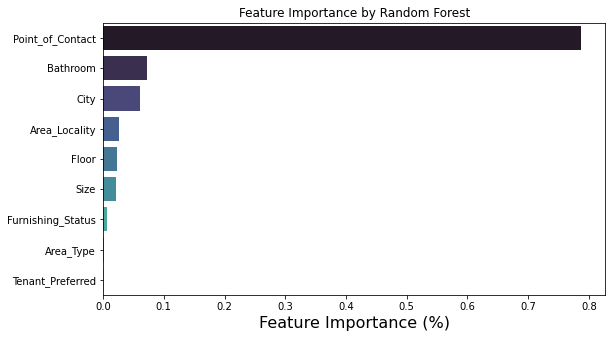

In [137]:
plt.figure(figsize=(9,5))
sns.barplot(x='importance', y='feature', data=xgb_df.sort_values('importance', ascending=False), palette='mako')
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)', fontsize=16)
plt.xticks(rotation=0)
plt.ylabel('')
plt.show()

###**7) Evaluation Machine Learning Models**

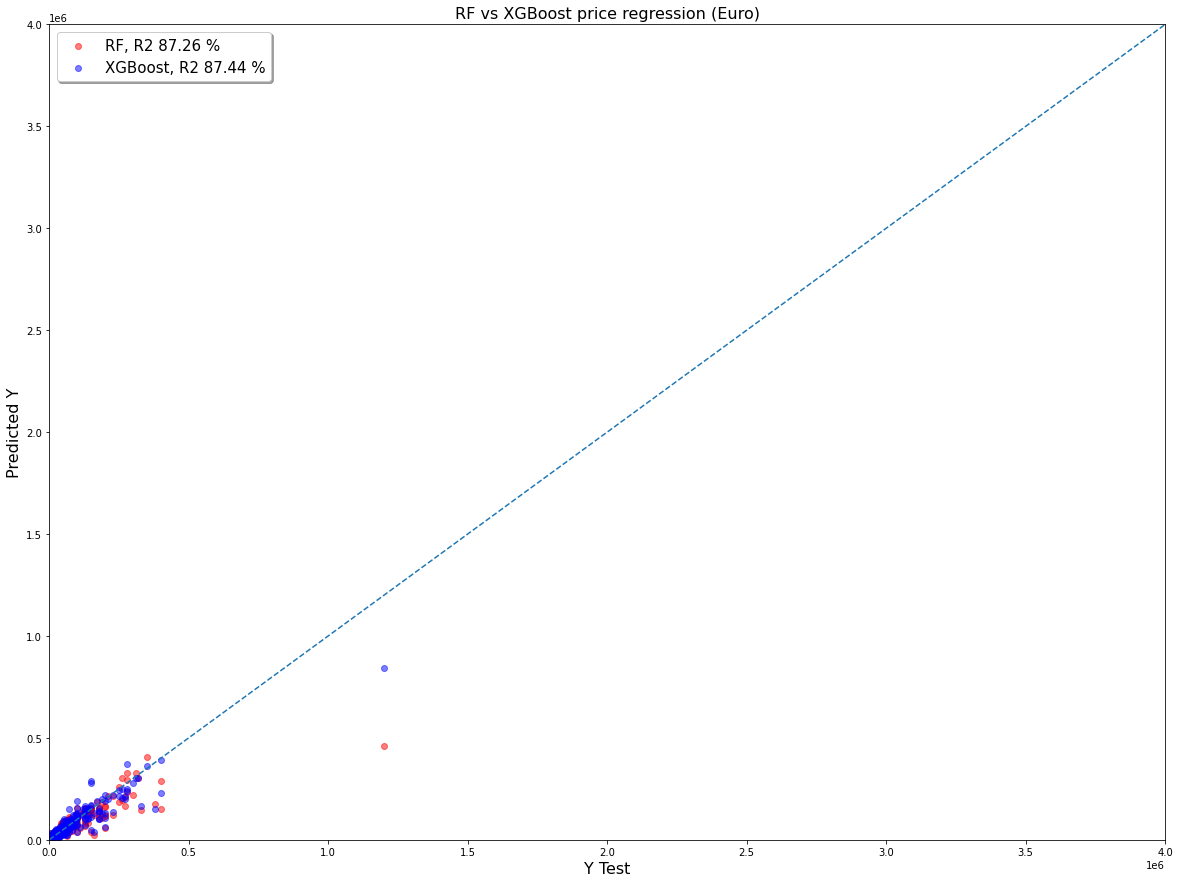

In [199]:
#Regression graph between Random Forest and XGBoost
plt.figure(figsize = (20,15))
plt.scatter(np.exp(y_test), np.exp(y_pred_rf_test_cv), alpha=0.5, color='red',label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf_test_cv)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_test_cv), alpha=0.5, color='blue',label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb_test_cv)*100))
plt.plot([0, 4000000], [0, 4000000], linestyle='--')
plt.axis([0, 4000000, 0, 4000000])
plt.xlabel('Y Test', fontsize=16)
plt.ylabel('Predicted Y',fontsize=16)
plt.title('RF vs XGBoost price regression (Euro)',fontsize=16)
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

In [200]:
predicted = []
testtrain = np.array(X)
for i in range(len(testtrain)):
    predicted.append(xgb_reg_randomcv.predict([testtrain[i]]))
    
predicted

[array([9.192149], dtype=float32),
 array([9.121289], dtype=float32),
 array([9.502164], dtype=float32),
 array([9.259755], dtype=float32),
 array([8.398067], dtype=float32),
 array([8.720479], dtype=float32),
 array([9.145052], dtype=float32),
 array([8.604791], dtype=float32),
 array([9.5177145], dtype=float32),
 array([9.264495], dtype=float32),
 array([9.904066], dtype=float32),
 array([8.584227], dtype=float32),
 array([8.749724], dtype=float32),
 array([8.699315], dtype=float32),
 array([9.182676], dtype=float32),
 array([9.57396], dtype=float32),
 array([8.722165], dtype=float32),
 array([9.026178], dtype=float32),
 array([9.417215], dtype=float32),
 array([8.880355], dtype=float32),
 array([8.920093], dtype=float32),
 array([8.638603], dtype=float32),
 array([8.438626], dtype=float32),
 array([9.320805], dtype=float32),
 array([8.805369], dtype=float32),
 array([9.221093], dtype=float32),
 array([8.505939], dtype=float32),
 array([9.127471], dtype=float32),
 array([8.941873], d

In [201]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]


In [202]:
rent = rent.drop(['Predicted_Price'], axis=1)

In [203]:
rent['Predicted_Price'] = np.array(ans)
rent

,Posted_On,BHK,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Rent_Price,Predicted_Price
0,2022-05-18,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000,9819.733398
1,2022-05-13,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000,9147.988281
2,2022-05-16,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000,13388.666016
3,2022-07-04,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000,10506.559570
4,2022-05-09,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500,4438.480957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,15000,11713.137695
4742,2022-05-15,3,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,29000,25048.556641
4743,2022-07-10,3,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,35000,31399.357422
4744,2022-07-06,3,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,45000,29694.625000


In [204]:
rent[rent['Rent_Price'] == 3500000]

,Posted_On,BHK,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Rent_Price,Predicted_Price
1837,2022-06-08,3,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent,3500000,679407.3125


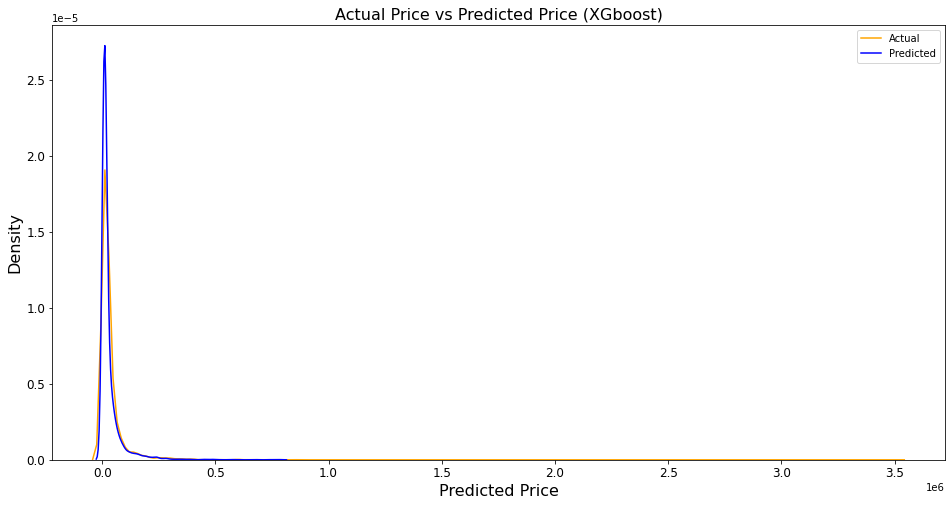

In [205]:
plt.figure(figsize=(16,8))
sns.distplot(rent['Rent_Price'],hist=False,color='orange',label='Actual')
sns.distplot(rent['Predicted_Price'],hist=False,color='blue',label='Predicted')
plt.title('Actual Price vs Predicted Price (XGboost)',fontsize=16)
plt.xlabel('Predicted Price',fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Density',fontsize=16)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.show()

In [206]:
rent.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.000000,2.000000,2.000000,3.000000,6.000000e+00
Size,4746.0,967.490729,634.202328,10.000000,550.000000,850.000000,1200.000000,8.000000e+03
Bathroom,4746.0,1.965866,0.884532,1.000000,1.000000,2.000000,2.000000,1.000000e+01
Rent_Price,4746.0,34993.451327,78106.412937,1200.000000,10000.000000,16000.000000,33000.000000,3.500000e+06
Predicted_Price,4746.0,30168.617188,52894.089844,3116.955078,8524.490234,12006.434082,28218.057129,7.851277e+05
